In [20]:
from scipy.linalg import dft
import numpy as np
import pennylane as qml

In [16]:
vector_a = np.array([0, 1])
print(vector_a)

[0 1]


In [11]:
dft(1)

array([[1.+0.j]])

In [24]:
dft(2) * 1/np.sqrt(2)

array([[ 0.70710678+0.00000000e+00j,  0.70710678+0.00000000e+00j],
       [ 0.70710678+0.00000000e+00j, -0.70710678-8.65956056e-17j]])

In [23]:
qml.adjoint(qml.QFT(wires=[0])).matrix()

array([[ 0.70710678-0.j,  0.70710678-0.j],
       [ 0.70710678-0.j, -0.70710678-0.j]])

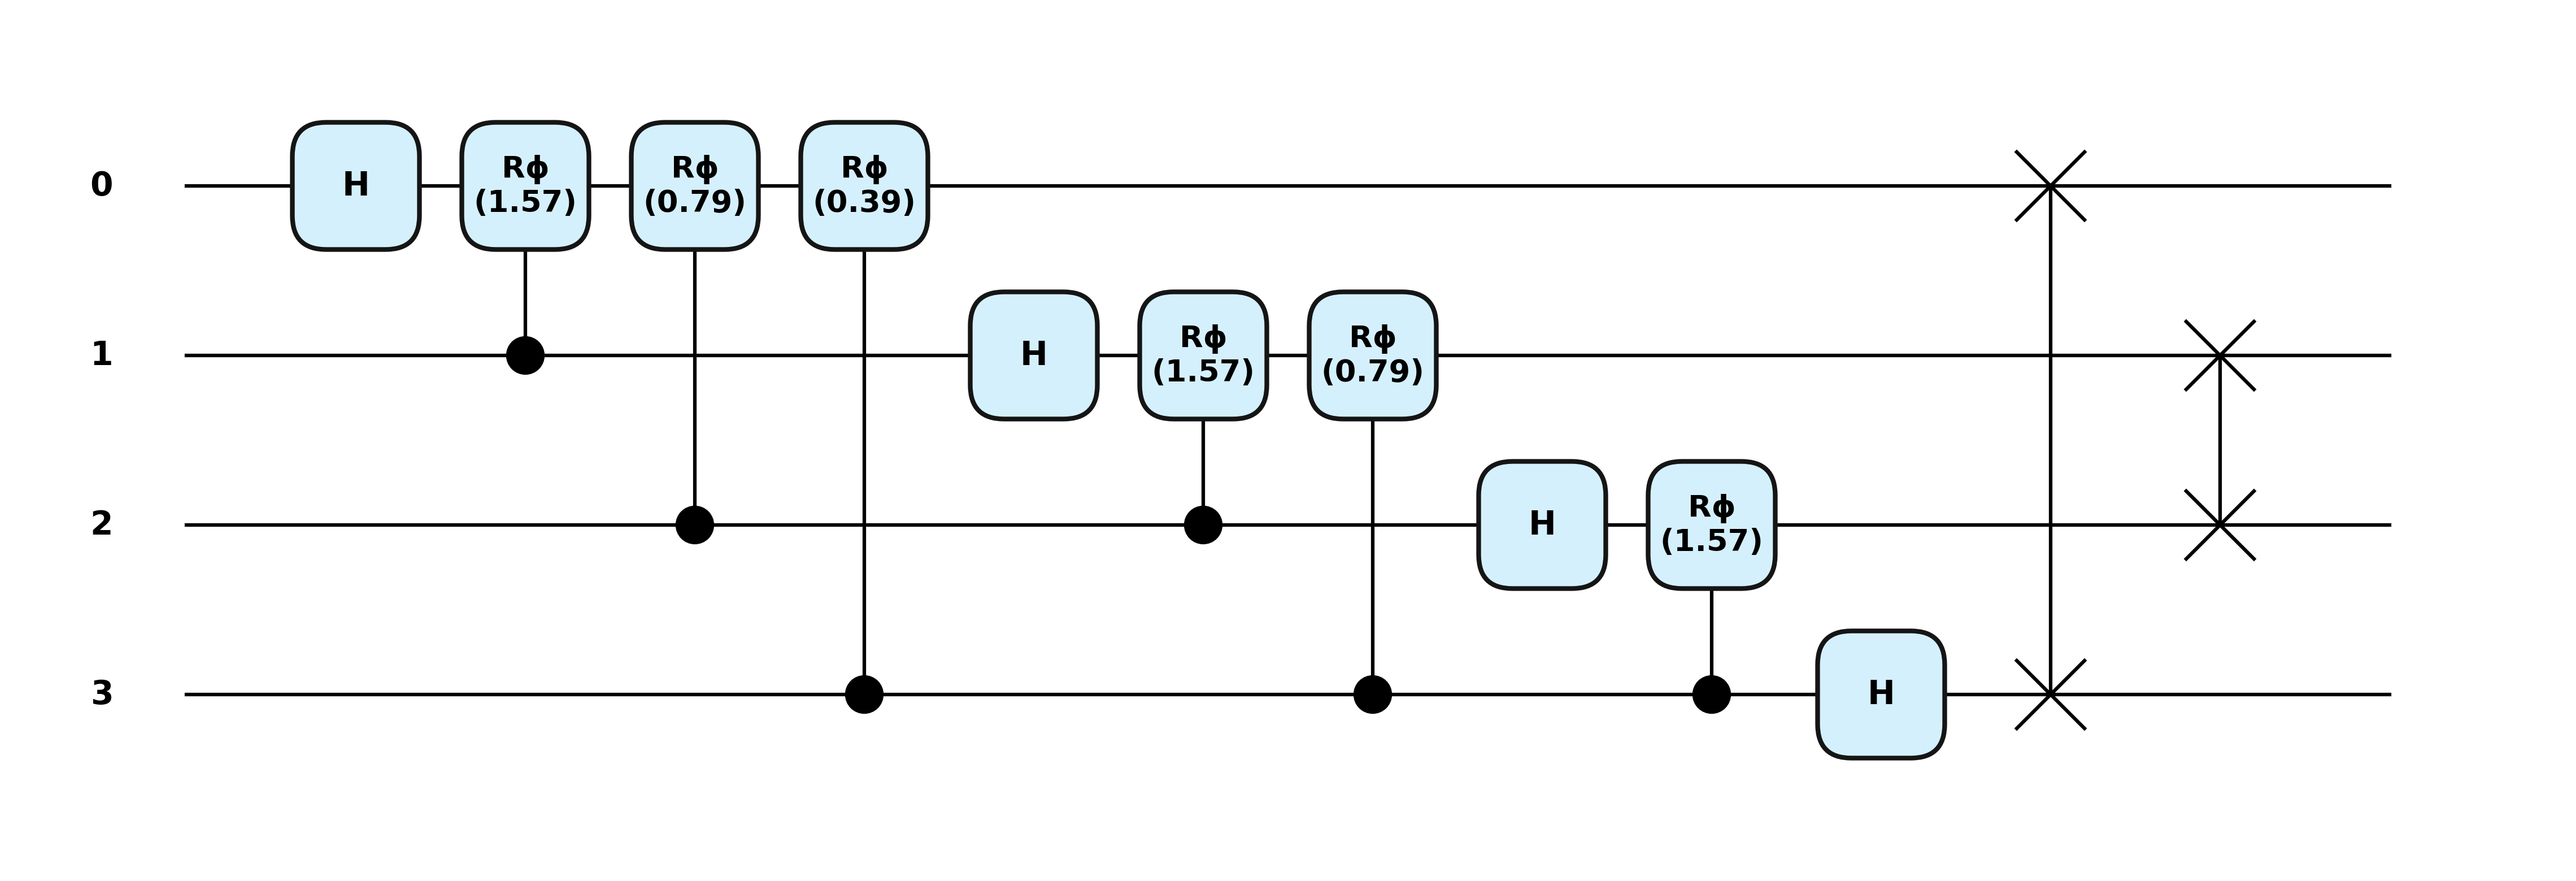

In [25]:
import pennylane as qml
from functools import partial
import matplotlib.pyplot as plt

plt.style.use('pennylane.drawer.plot')

# This line is to expand the circuit to see the operators
@partial(qml.transforms.decompose, max_expansion=1)

def circuit():
    qml.QFT(wires=range(4))

qml.draw_mpl(circuit, decimals = 2, style = "pennylane")()
plt.show()

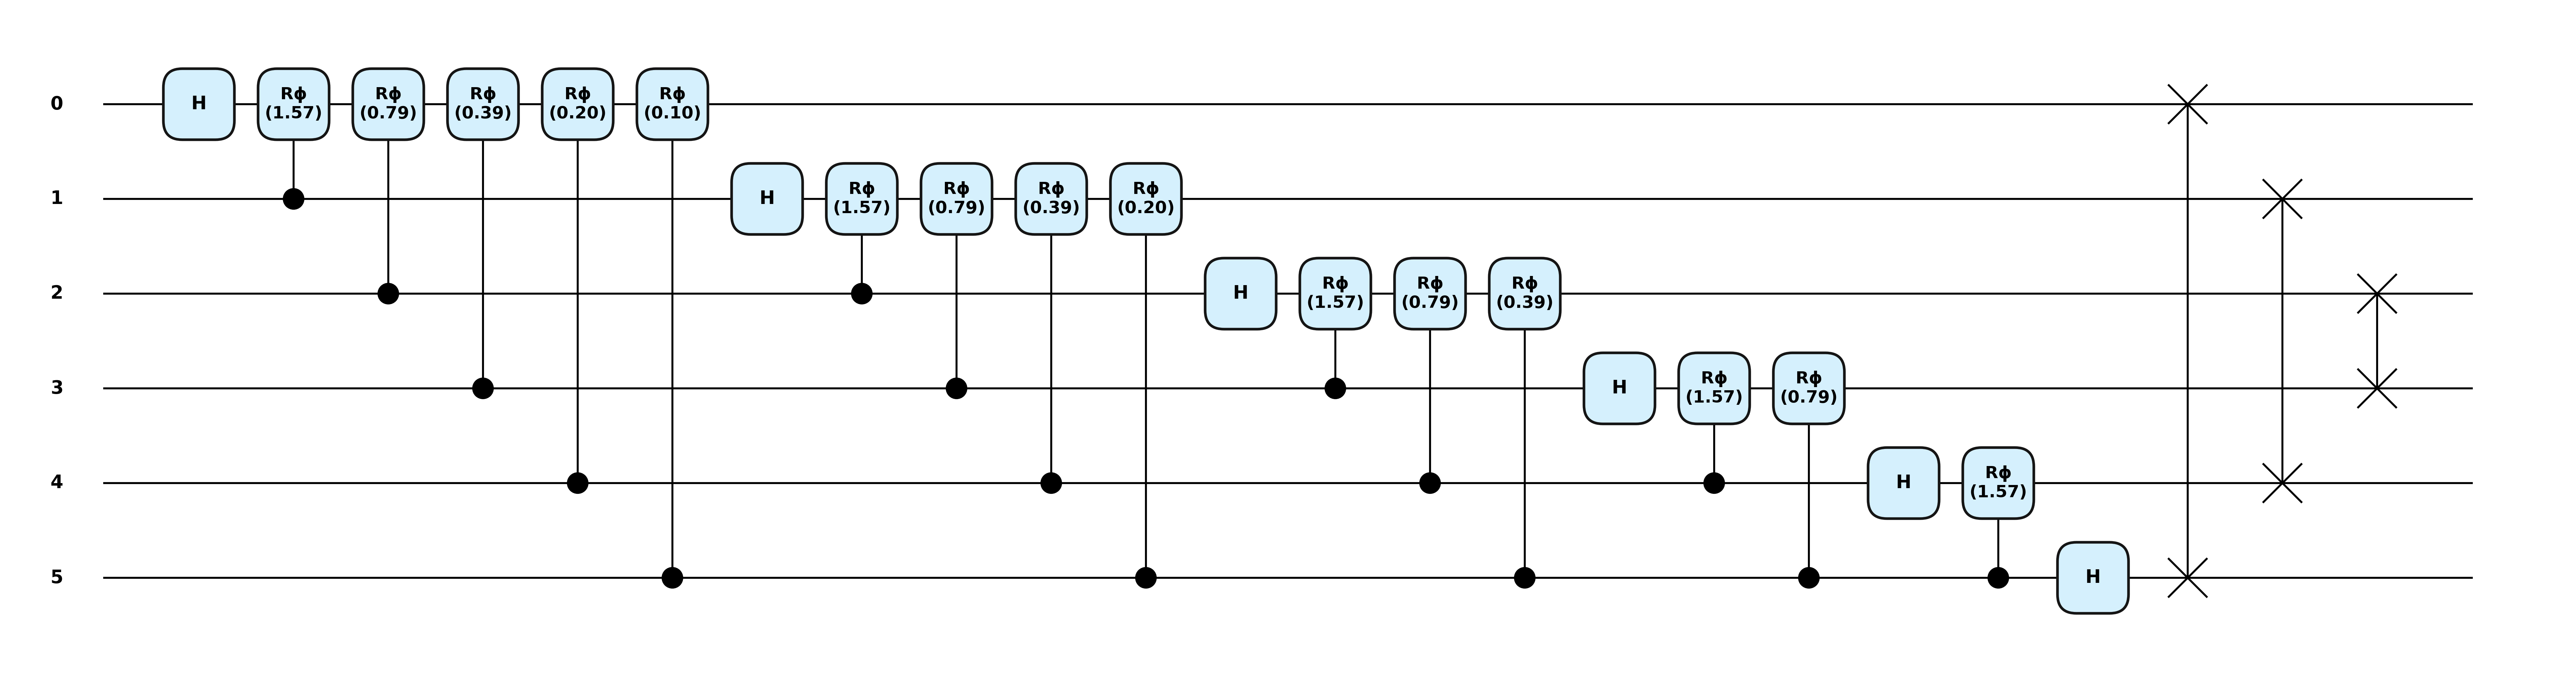

In [27]:
import pennylane as qml
from functools import partial
import matplotlib.pyplot as plt

plt.style.use('pennylane.drawer.plot')

# This line is to expand the circuit to see the operators
@partial(qml.transforms.decompose, max_expansion=1)

def circuit():
    qml.QFT(wires=range(6))

qml.draw_mpl(circuit, decimals = 2, style = "pennylane")()
plt.show()

(<Figure size 1800x2100 with 1 Axes>, <Axes: >)

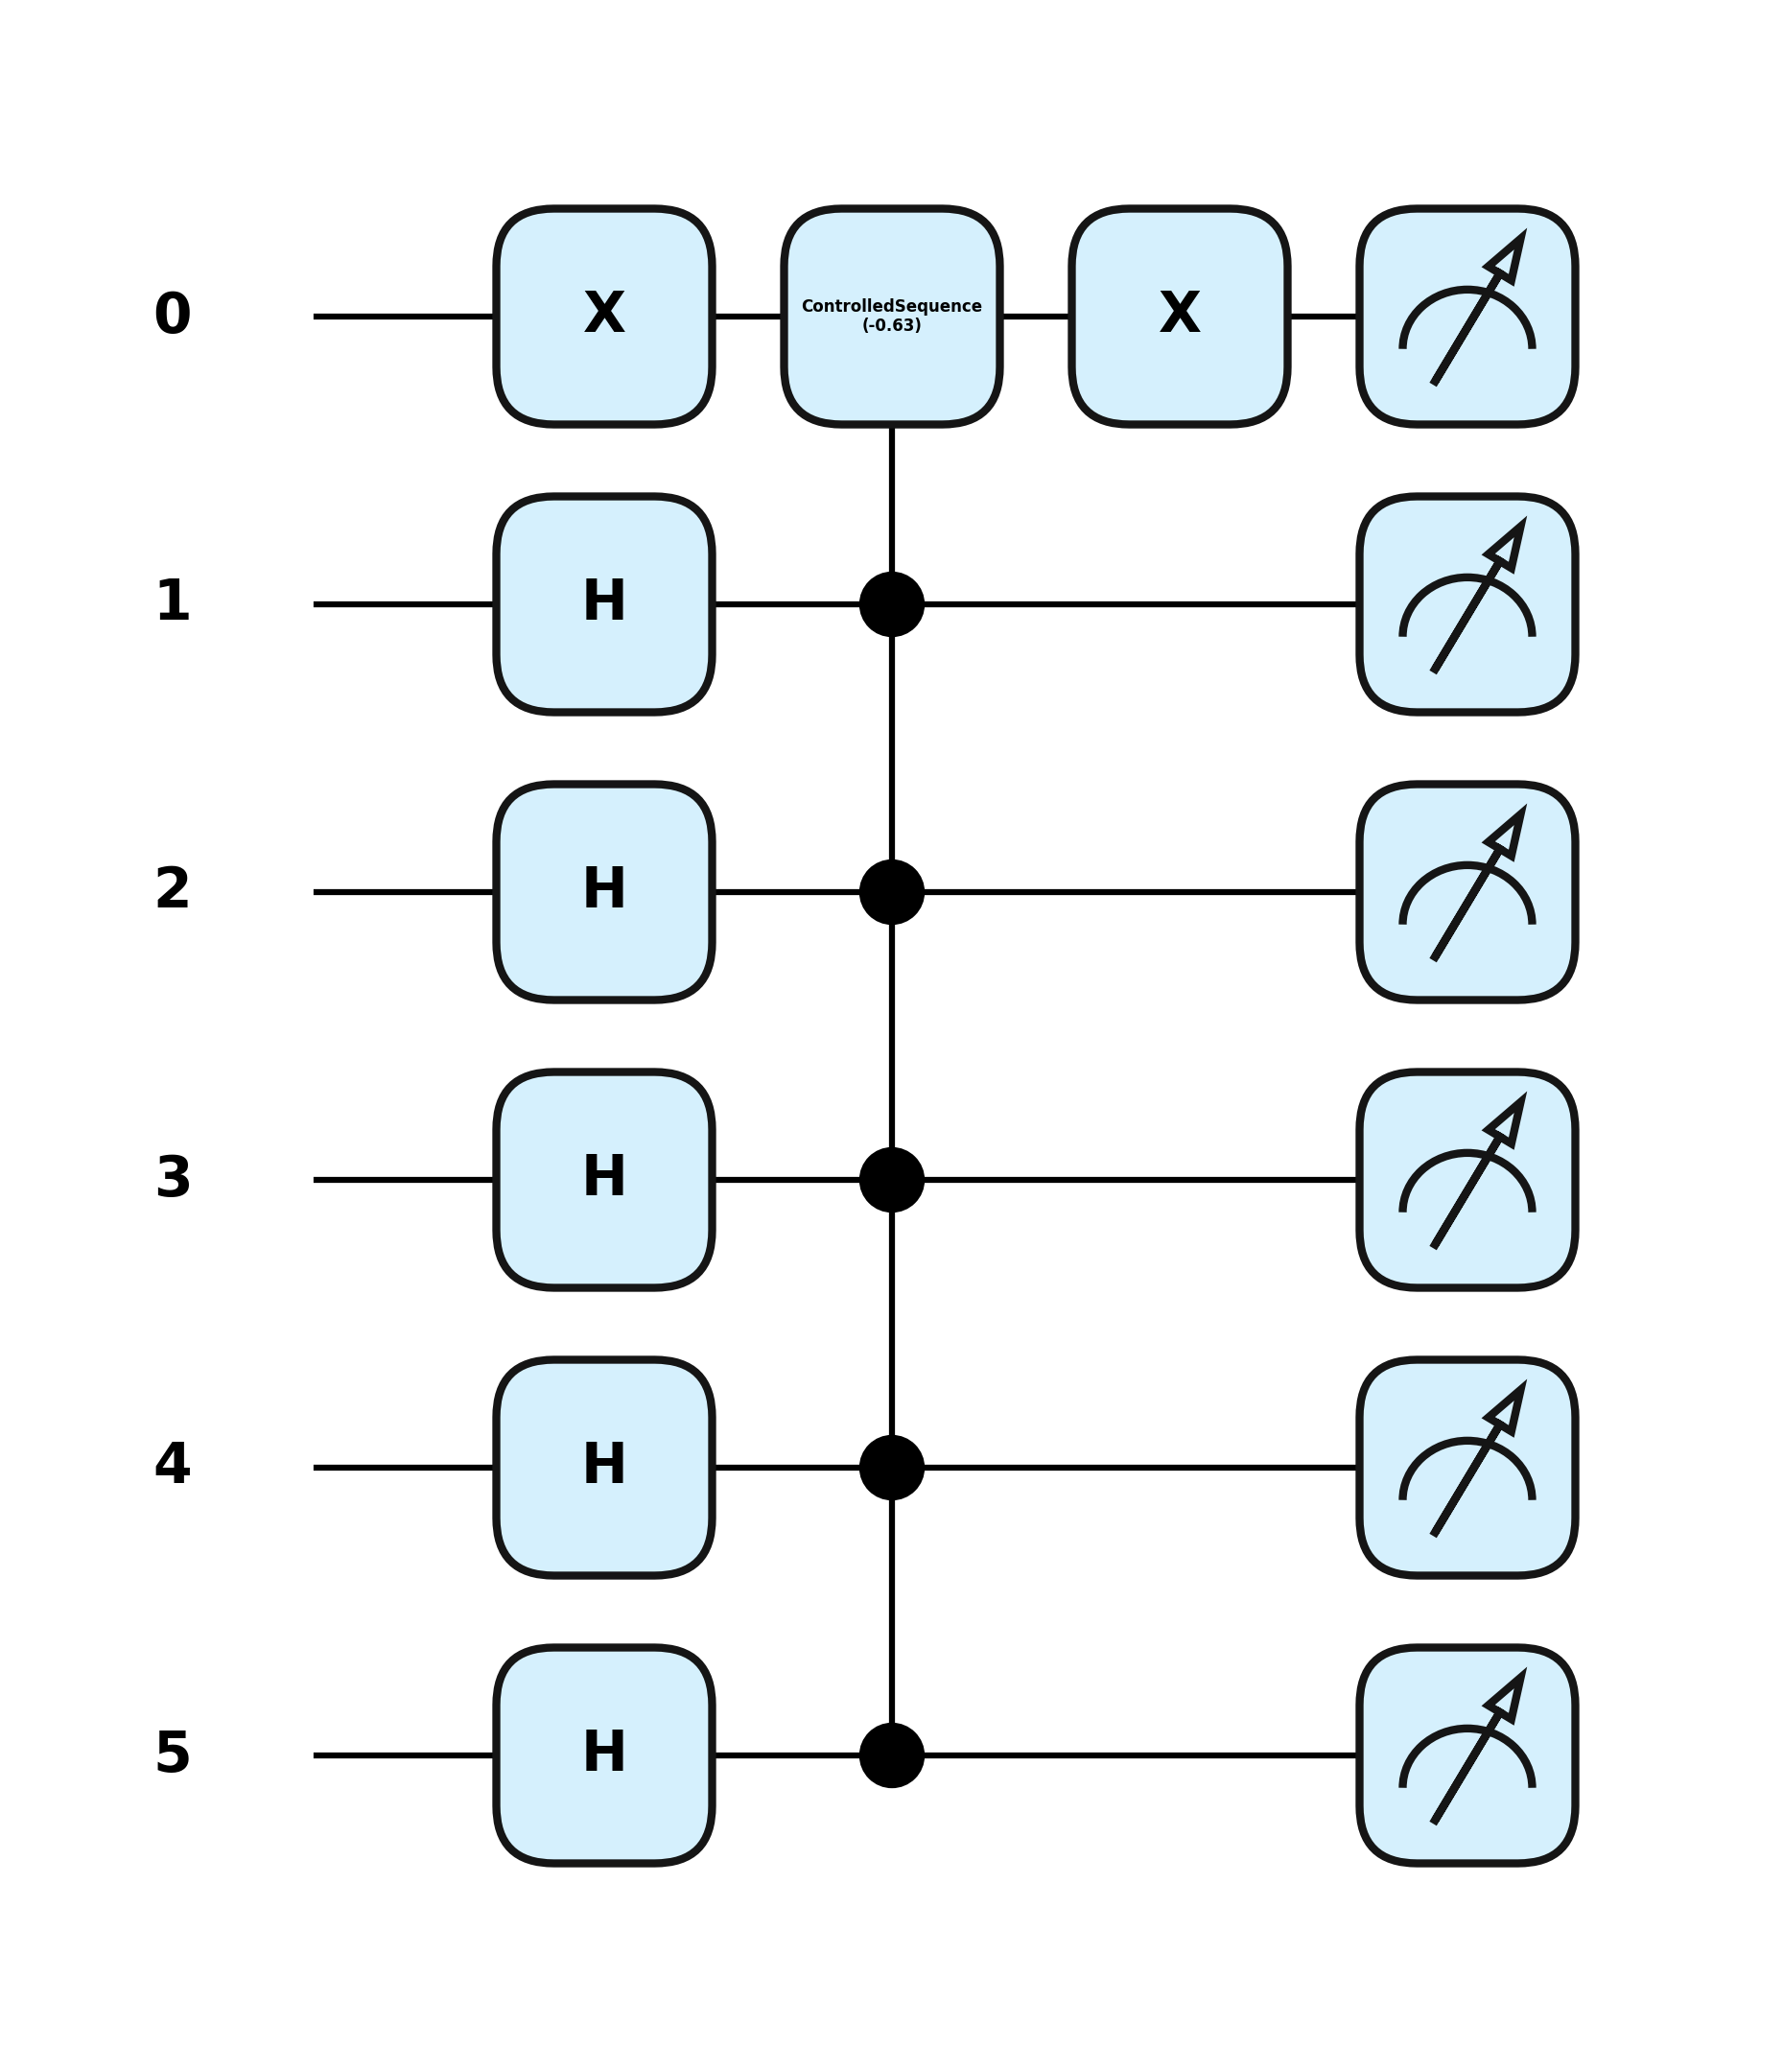

In [37]:
def prep():
    """quntum function that prepares the state."""
    qml.PauliX(wires=0)
    for wire in range(1, 6):
        qml.Hadamard(wires=wire)
    qml.ControlledSequence(qml.PhaseShift(-2 * np.pi / 10, wires=0), control=range(1, 6))
    qml.PauliX(wires=0)

dev = qml.device("default.qubit")
@qml.qnode(dev)
def circuit():
    prep()
    return qml.state()

qml.draw_mpl(circuit, decimals = 2, style = "pennylane")()

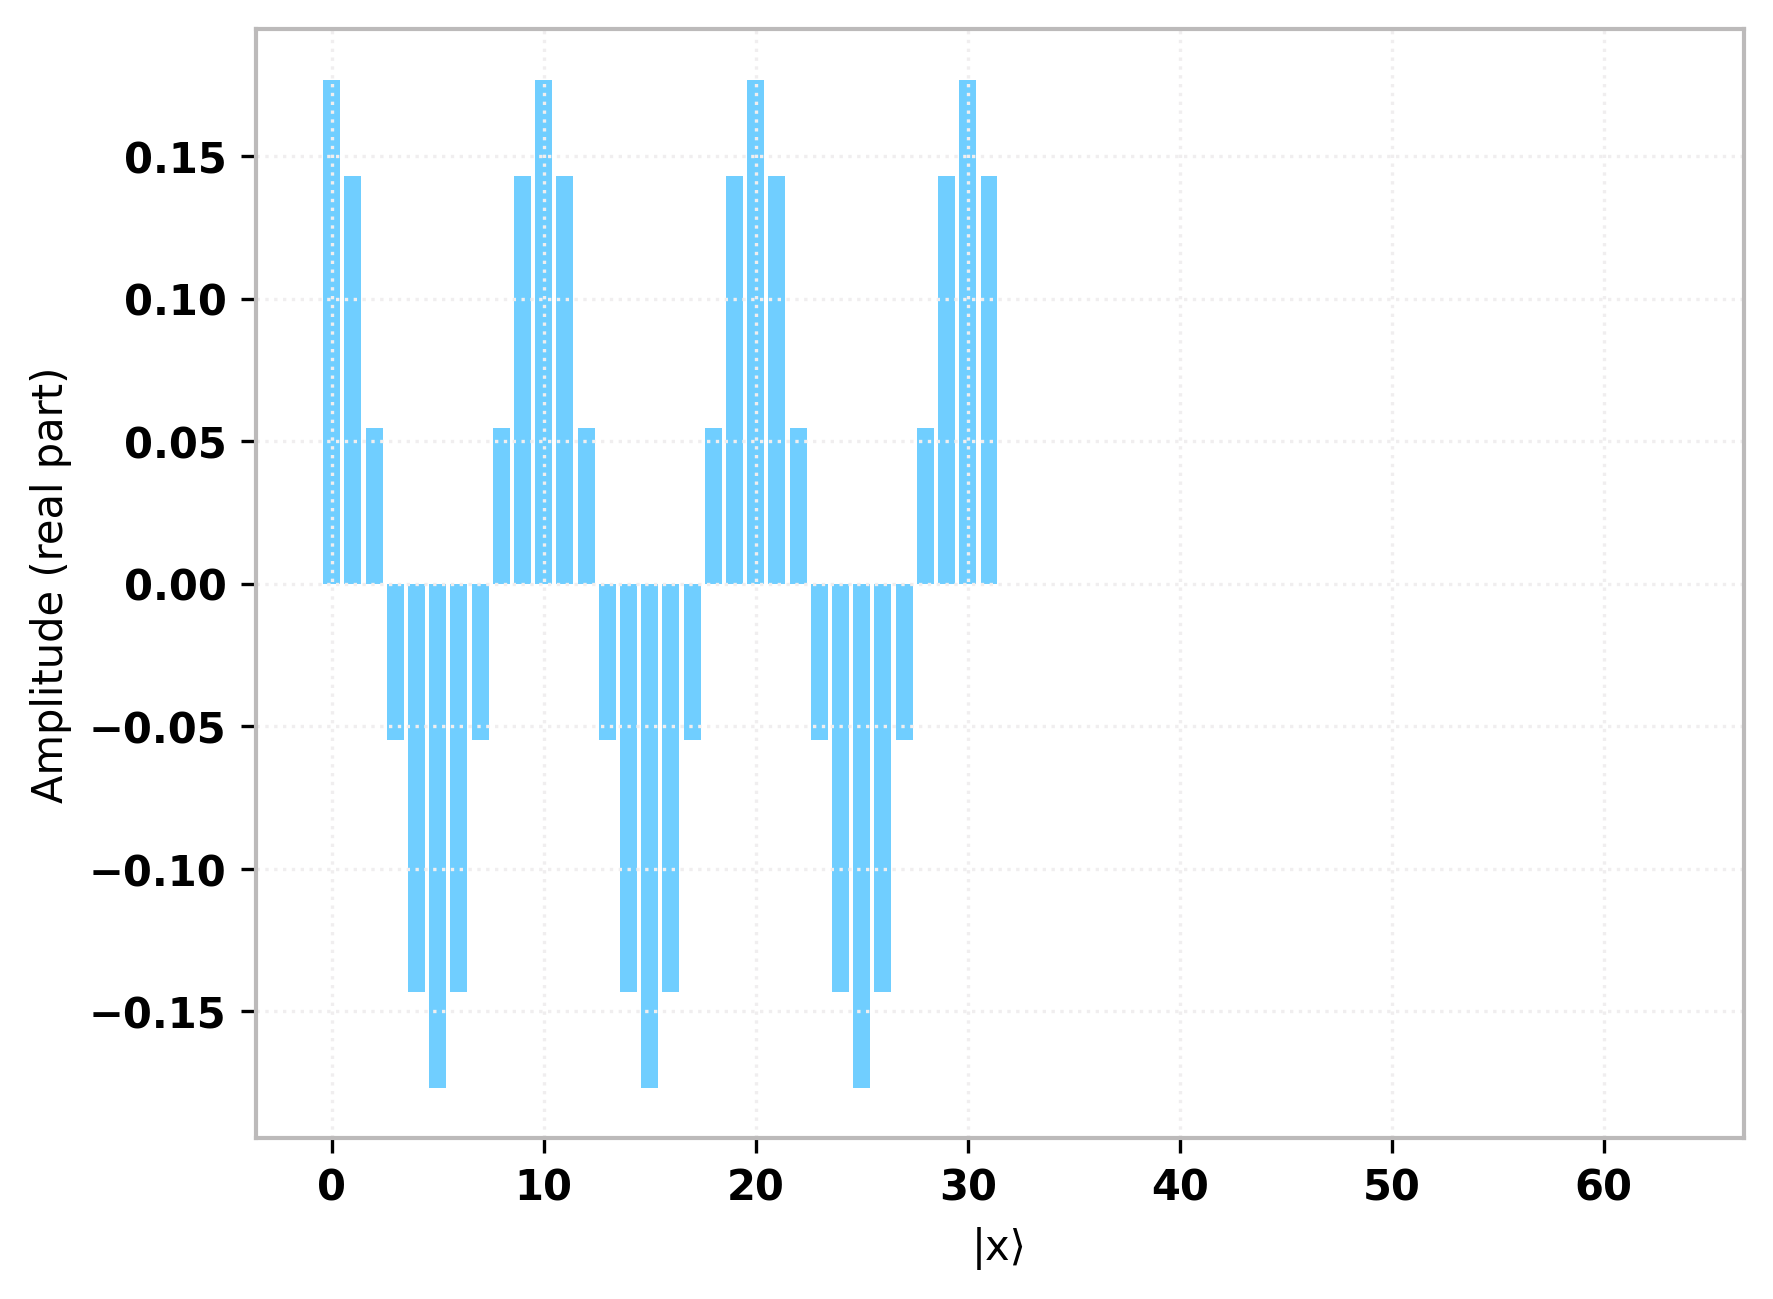

In [38]:
state = circuit().real#[:32]

plt.bar(range(len(state)), state)
plt.xlabel("|x⟩")
plt.ylabel("Amplitude (real part)")
plt.show()